# All sites
### moving to the linux box because of memory issues

In [1]:
# import packages 
# %matplotlib widget
%matplotlib inline

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()
# plt.rcParams['figure.figsize'] = [12,6] #overriding size

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

import geopandas as gpd
# import rasterio as rio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import rioxarray
import rasterio
# import rasterstats

## Working with raw NCALM Data for tidy plots

In [2]:
pwd

'/home/lumbraca/raster/python'

In [3]:
ce_dsm = rioxarray.open_rasterio("/home/lumbraca/raster/data/NCALM/SOUT_GEF_03F.tif", masked=True)
ce_dtm = rioxarray.open_rasterio("/home/lumbraca/raster/data/NCALM/SOUT_GEG_03F.tif", masked=True)

sr_dsm = rioxarray.open_rasterio("/home/lumbraca/raster/data/NCALM/CENT_GEF_03F.tif", masked=True)
sr_dtm = rioxarray.open_rasterio("/home/lumbraca/raster/data/NCALM/CENT_GEG_03F.tif", masked=True)

fl_dsm = rioxarray.open_rasterio("/home/lumbraca/raster/data/NCALM/NORT_GEF_03F.tif", masked=True)
fl_dtm = rioxarray.open_rasterio("/home/lumbraca/raster/data/NCALM/NORT_GEG_03F.tif", masked=True)

In [4]:
# Put all of those tifs into a tidy xarray python dataset 
ce_ds = xr.Dataset({"dsm":ce_dsm,
                 "dtm":ce_dtm.rio.reproject_match(ce_dsm, resampling = rasterio.enums.Resampling.bilinear)})

sr_ds = xr.Dataset({"dsm":sr_dsm,
                 "dtm":sr_dtm.rio.reproject_match(sr_dsm, resampling = rasterio.enums.Resampling.bilinear)})

fl_ds = xr.Dataset({"dsm":fl_dsm,
                 "dtm":fl_dtm.rio.reproject_match(fl_dsm, resampling = rasterio.enums.Resampling.bilinear)})

# Convert everything to meters 
ce_ds['dsm'] = ce_ds['dsm'] * 0.3048 # convert to meters
ce_ds['dtm'] = ce_ds['dtm'] * 0.3048 # convert to meters

sr_ds['dsm'] = sr_ds['dsm'] * 0.3048 # convert to meters
sr_ds['dtm'] = sr_ds['dtm'] * 0.3048 # convert to meters

fl_ds['dsm'] = fl_ds['dsm'] * 0.3048 # convert to meters
fl_ds['dtm'] = fl_ds['dtm'] * 0.3048 # convert to meters

In [5]:
# Create chm with snow on datasets only 
ce_ds['chm'] = ce_ds['dsm'] - ce_ds['dtm']
sr_ds['chm'] = sr_ds['dsm'] - sr_ds['dtm']
fl_ds['chm'] = fl_ds['dsm'] - fl_ds['dtm']

In [6]:
# Just in case there are some weird negative values in the dataset 
ce_ds['chm'] = ce_ds['chm'].where(ce_ds['chm'] > 0, drop=True) 
sr_ds['chm'] = sr_ds['chm'].where(sr_ds['chm'] > 0, drop=True) 
fl_ds['chm'] = fl_ds['chm'].where(fl_ds['chm'] > 0, drop=True) 

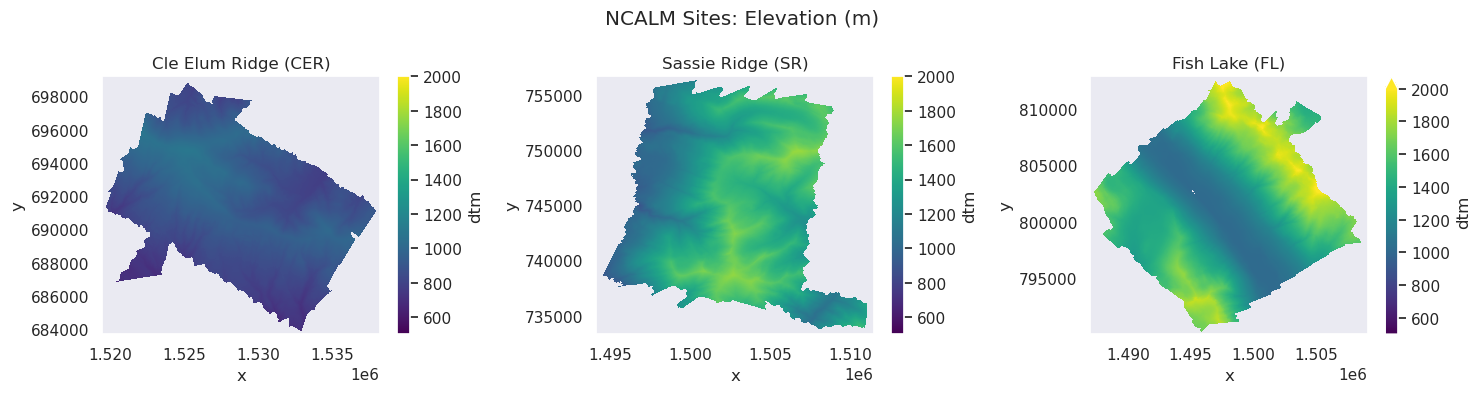

In [10]:
f, axes = plt.subplots(1, 3, figsize=(15,4))

f.suptitle('NCALM Sites: Elevation (m)')

ce_ds.dtm.plot(ax=axes[0], cmap='viridis', vmin=500, vmax=2000)
sr_ds.dtm.plot(ax=axes[1], cmap='viridis', vmin=500, vmax=2000)
fl_ds.dtm.plot(ax=axes[2], cmap='viridis', vmin=500, vmax=2000)

axes[0].set_title('Cle Elum Ridge (CER)')
axes[1].set_title('Sassie Ridge (SR)')
axes[2].set_title('Fish Lake (FL)')

plt.tight_layout()

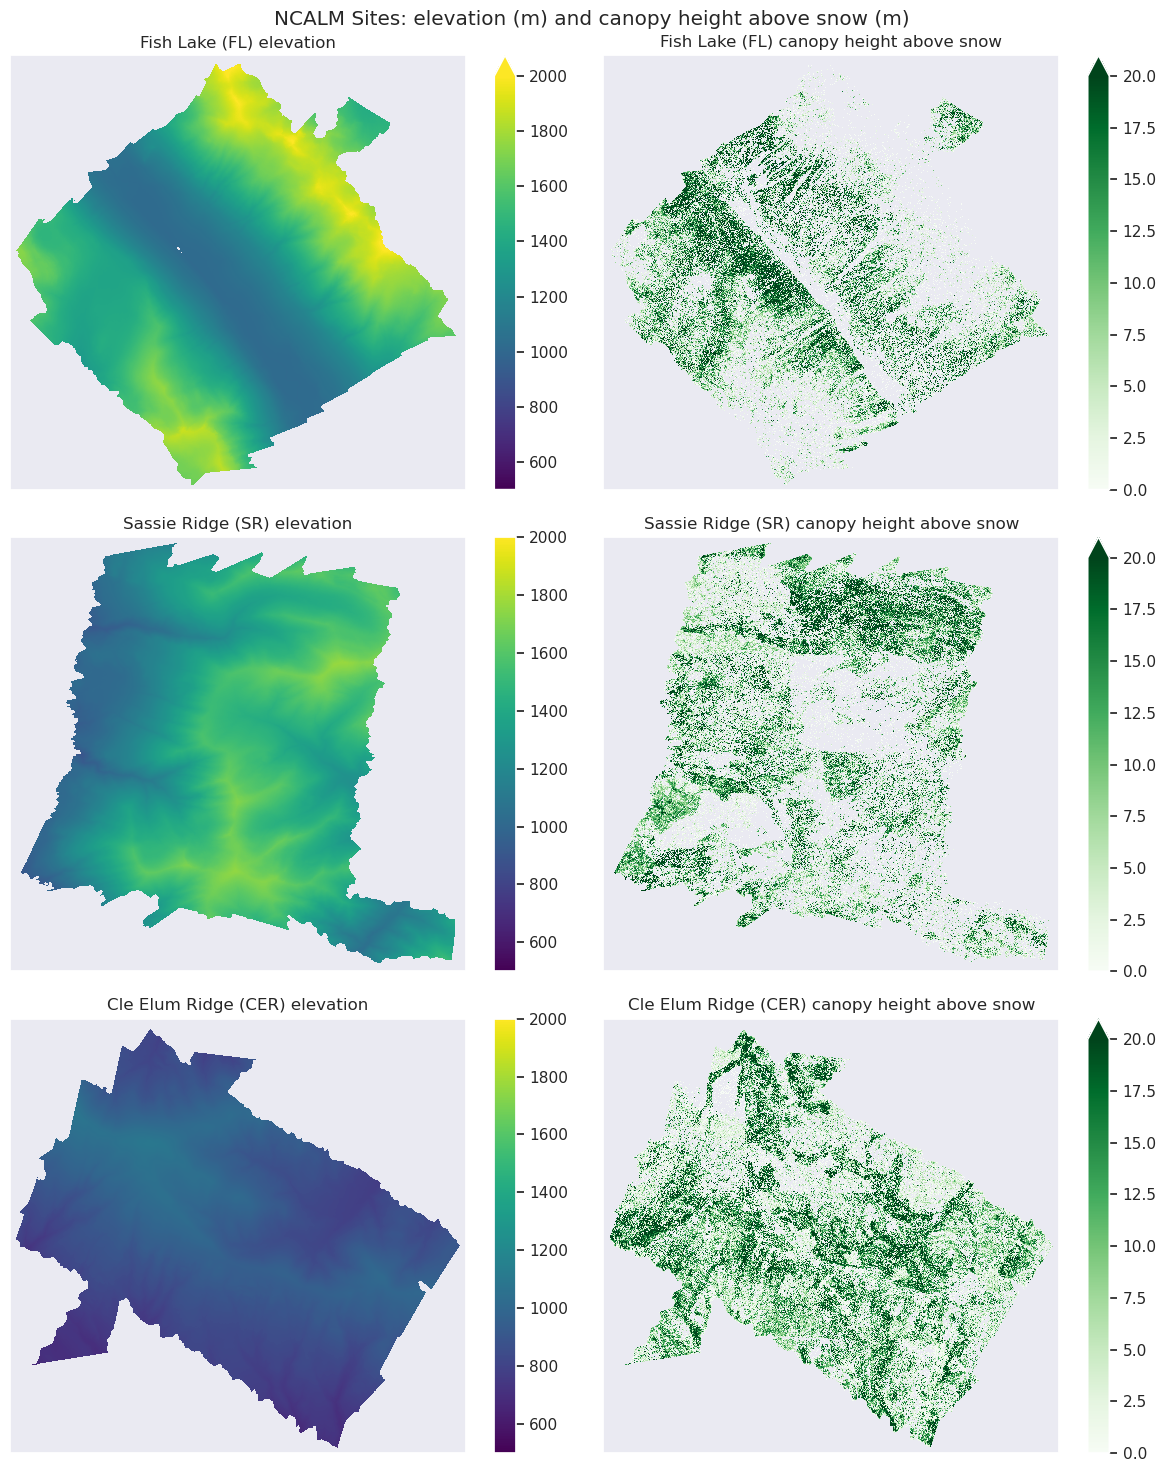

In [7]:
f, axes = plt.subplots(3, 2, figsize=(12,15))

#[rows,columns]

f.suptitle('NCALM Sites: elevation (m) and canopy height above snow (m)')

fl_ds.dtm.plot(ax=axes[0,0], cmap='viridis', vmin=500, vmax=2000, cbar_kwargs={'label':''})
fl_ds.chm.plot(ax=axes[0,1], cmap='Greens', vmin=0, vmax=20, cbar_kwargs={'label':''})

sr_ds.dtm.plot(ax=axes[1,0], cmap='viridis', vmin=500, vmax=2000, cbar_kwargs={'label':''})
sr_ds.chm.plot(ax=axes[1,1], cmap='Greens', vmin=0, vmax=20, cbar_kwargs={'label':''})

ce_ds.dtm.plot(ax=axes[2,0], cmap='viridis', vmin=500, vmax=2000, cbar_kwargs={'label':''})
ce_ds.chm.plot(ax=axes[2,1], cmap='Greens', vmin=0, vmax=20, cbar_kwargs={'label':''})


axes[0,0].set_title('Fish Lake (FL) elevation')
axes[0,1].set_title('Fish Lake (FL) canopy height above snow')

axes[1,0].set_title('Sassie Ridge (SR) elevation')
axes[1,1].set_title('Sassie Ridge (SR) canopy height above snow')

axes[2,0].set_title('Cle Elum Ridge (CER) elevation')
axes[2,1].set_title('Cle Elum Ridge (CER) canopy height above snow')


axes[0,0].set_xlabel('')
axes[0,1].set_xlabel('')
axes[1,0].set_xlabel('')
axes[1,1].set_xlabel('')
axes[2,0].set_xlabel('')
axes[2,1].set_xlabel('')

axes[0,0].set_ylabel('')
axes[0,1].set_ylabel('')
axes[1,0].set_ylabel('')
axes[1,1].set_ylabel('')
axes[2,0].set_ylabel('')
axes[2,1].set_ylabel('')

axes[0,0].set_xticks([]); axes[0,0].set_yticks([])
axes[0,1].set_xticks([]); axes[0,1].set_yticks([])
axes[1,0].set_xticks([]); axes[1,0].set_yticks([])
axes[1,1].set_xticks([]); axes[1,1].set_yticks([])
axes[2,0].set_xticks([]); axes[2,0].set_yticks([])
axes[2,1].set_xticks([]); axes[2,1].set_yticks([])

axes[0,0].set_xticks([]); axes[0,0].set_yticks([])
axes[0,1].set_xticks([]); axes[0,1].set_yticks([])
axes[1,0].set_xticks([]); axes[1,0].set_yticks([])
axes[1,1].set_xticks([]); axes[1,1].set_yticks([])
axes[2,0].set_xticks([]); axes[2,0].set_yticks([])
axes[2,1].set_xticks([]); axes[2,1].set_yticks([])

plt.tight_layout()